In [2]:

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
import os

real = "../input/real-and-fake-face-detection/real_and_fake_face/training_real/"
fake = "../input/real-and-fake-face-detection/real_and_fake_face/training_fake/"
datadir = "../input/real-and-fake-face-detection/real_and_fake_face/"


real_path = os.listdir(real)
fake_path = os.listdir(fake)

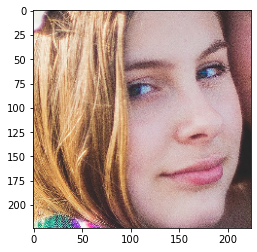

In [10]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
#     print(labels)
    return image[...,::-1]
plt.imshow(load_img(real + real_path[4]), cmap='gray')


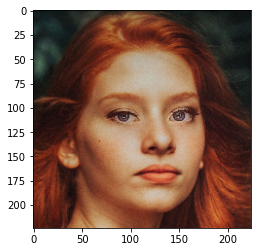

In [11]:
plt.imshow(load_img(fake + fake_path[37]), cmap='gray')

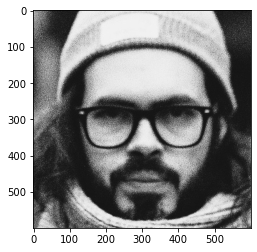

training_real


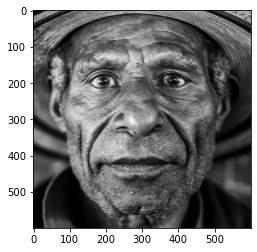

training_real


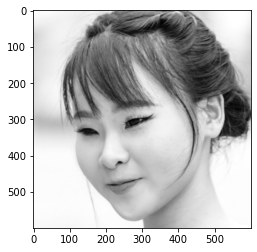

training_real


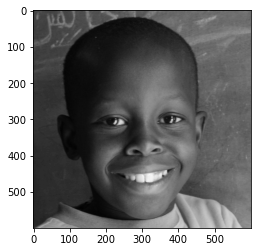

training_real


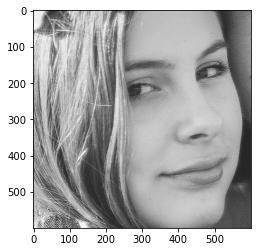

training_real


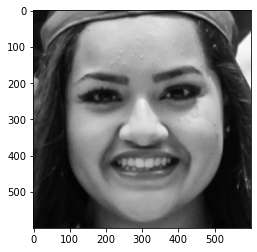

training_real


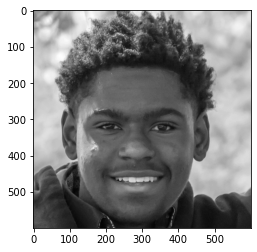

training_real


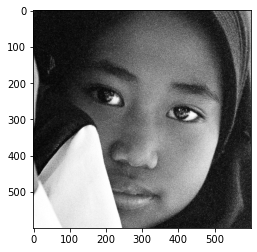

training_real


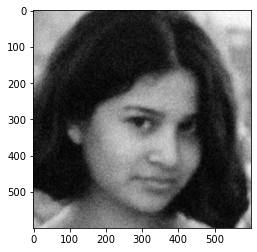

training_real


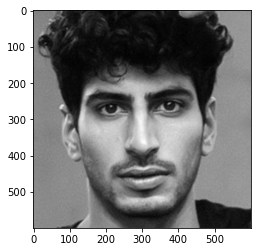

training_real


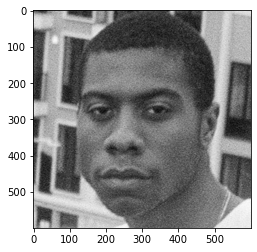

training_real


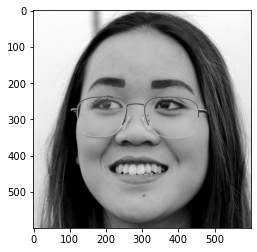

training_real


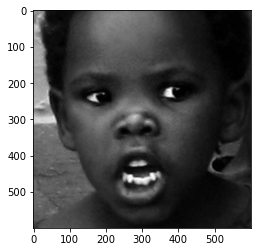

training_real


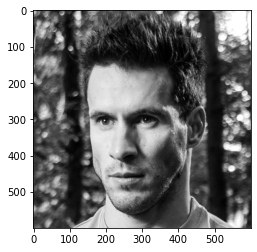

training_real


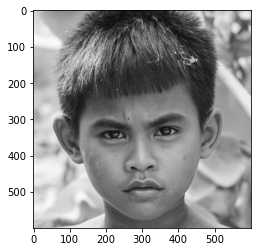

training_real


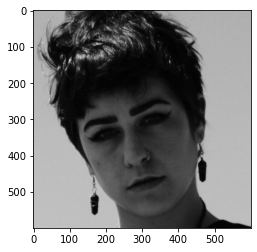

training_real


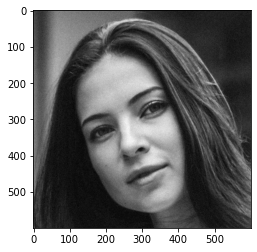

training_real


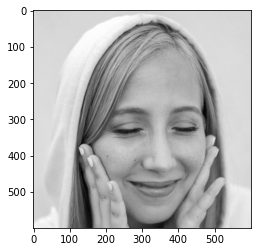

training_real


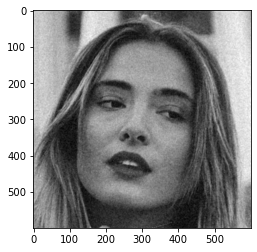

training_real


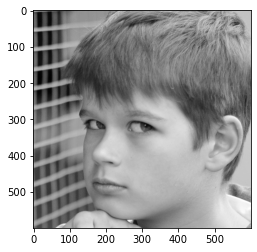

training_real


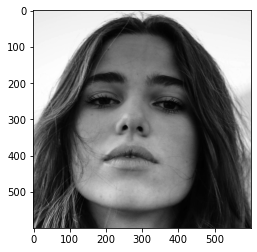

training_real


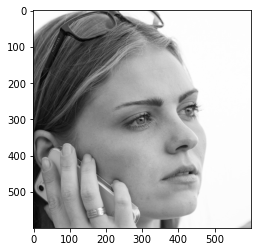

training_real


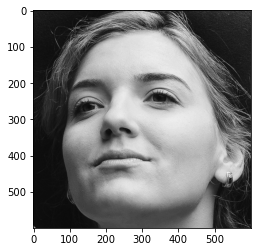

training_real


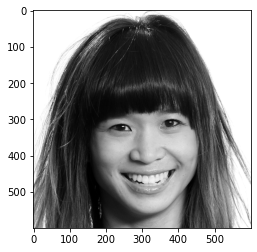

training_real


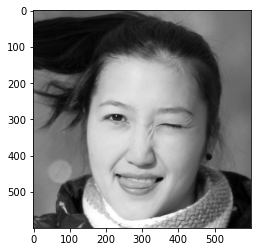

training_real


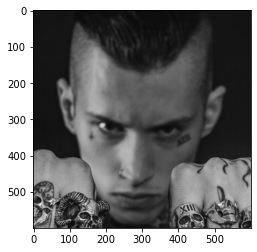

training_real


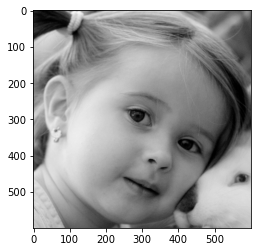

training_real


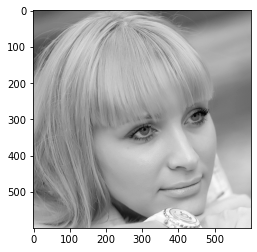

training_real


KeyboardInterrupt: 

In [13]:
categories = ["training_real" , "training_fake"]

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        # plt.imshow(img_array, cmap= plt.cm.binary)
        plt.show()
        print(category)
    break
    


In [15]:
training_data = []
IMG_SIZE = 224

## This means 0 will indicate Real facial Images and 1 to Fake facial Images.

categories = ["training_real" , "training_fake"]

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                pass
create_training_data()
training_data = np.array(training_data)
print(training_data.shape)

(2041, 2)


In [16]:
import random

np.random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
0
0
1
1
0


In [18]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [19]:
X = X/255.0 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

train_x = tf.keras.utils.normalize(X_train,axis=1)
test_x = tf.keras.utils.normalize(X_test, axis=1)

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
vgg16_model = keras.applications.vgg16.VGG16()
vgg16_model.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [22]:
from keras.models import Sequential

model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train,y_train, batch_size=20, epochs = 50, validation_split=0.1)

Epoch 1/50
74/74 [==============================] - 7s 93ms/step - loss: 0.7734 - accuracy: 0.5545 - val_loss: 0.9769 - val_accuracy: 0.5366
Epoch 2/50
74/74 [==============================] - 6s 79ms/step - loss: 0.7438 - accuracy: 0.5811 - val_loss: 0.7056 - val_accuracy: 0.5671
Epoch 3/50
74/74 [==============================] - 6s 80ms/step - loss: 0.7192 - accuracy: 0.5702 - val_loss: 0.6820 - val_accuracy: 0.5549
Epoch 4/50
74/74 [==============================] - 6s 81ms/step - loss: 0.6886 - accuracy: 0.6158 - val_loss: 0.6683 - val_accuracy: 0.5732
Epoch 5/50
74/74 [==============================] - 6s 80ms/step - loss: 0.6899 - accuracy: 0.5926 - val_loss: 0.6722 - val_accuracy: 0.5610
Epoch 6/50
74/74 [==============================] - 6s 80ms/step - loss: 0.6686 - accuracy: 0.6063 - val_loss: 0.7364 - val_accuracy: 0.5732
Epoch 7/50
74/74 [==============================] - 6s 80ms/step - loss: 0.6360 - accuracy: 0.6424 - val_loss: 0.6768 - val_accuracy: 0.5732
Epoch 8/50
74

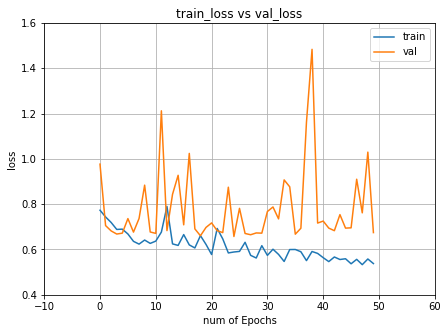

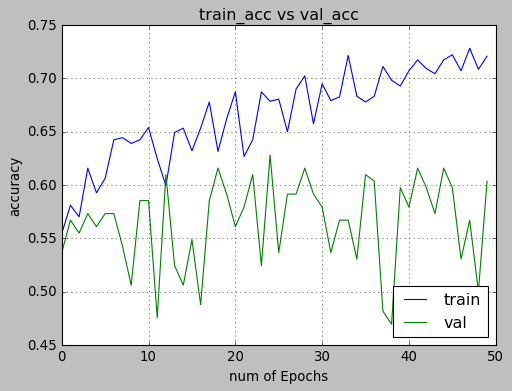

In [23]:
epochs = 50
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [24]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

13/13 [==============================] - 2s 121ms/step - loss: 0.7245 - accuracy: 0.6039
0.7245038151741028
0.6039119958877563


In [26]:
predictions = model.predict(X_test)
rounded_prediction = model.predict_classes(x = X_test, batch_size=10, verbose=0)
for i in rounded_prediction[:10]:
    print(i)

1
0
1
1
1
1
0
0
0
0


In [29]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[106 112]
 [ 50 141]]


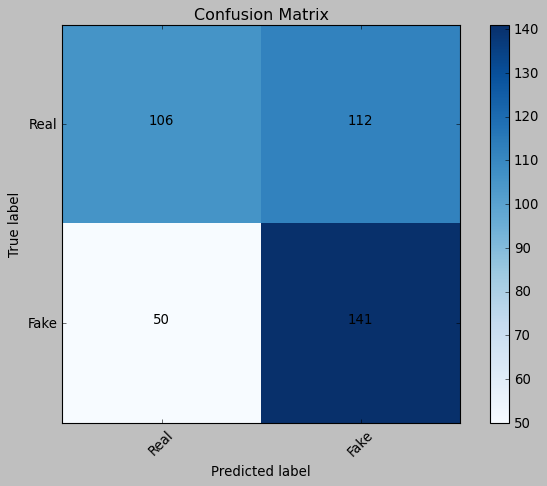

In [30]:
cm = confusion_matrix(y_test,rounded_prediction)
cm_plot_labels = ['Real', 'Fake']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [31]:
## Just Run this once and you can change the number of the images mentioned for prediction and model result.

## For Image Display.
def load_img(path):
    image = cv2.resize(path, (224, 224))
    return image[...,::-1]

## For Predicting result.
def prepare(image):
    IMG_SIZE = 224
    new_array = cv2.resize(image, (IMG_SIZE, IMG_SIZE)) 
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,3)

Probabilities:  [[0.33223897 0.667761  ]]
Actual:  Real-Face
Prediction:  Fake-Face


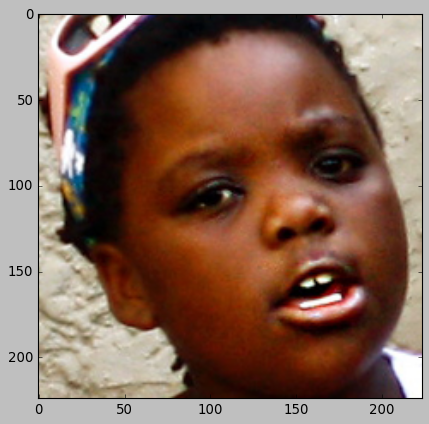

In [32]:
n = 43

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",prediction)

x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction = model.predict_classes(x = prepare(X_test[n]), batch_size=10, verbose=0)
y = ["Real-Face" if rounded_prediction[0]== 0 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

Probabilities:  [[0.6236071  0.37639293]]
Actual:  Real-Face
Prediction:  Real-Face


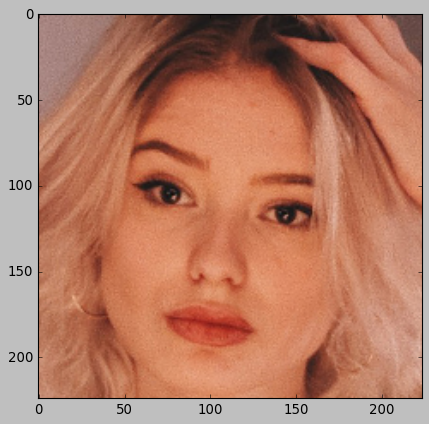

In [33]:
n = 120

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",prediction)
x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction = model.predict_classes(x = prepare(X_test[n]), batch_size=10, verbose=0)
y = ["Real-Face" if rounded_prediction[0]== 0 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

Probabilities:  [[0.28114143 0.7188586 ]]
Actual:  Fake-Face
Prediction:  Fake-Face


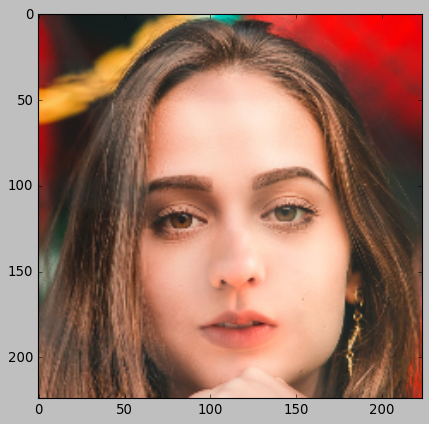

In [37]:
n = 16

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",prediction)
x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction = model.predict_classes(x = prepare(X_test[n]), batch_size=10, verbose=0)
y = ["Real-Face" if rounded_prediction[0]== 0 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()